In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Dataset Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol    

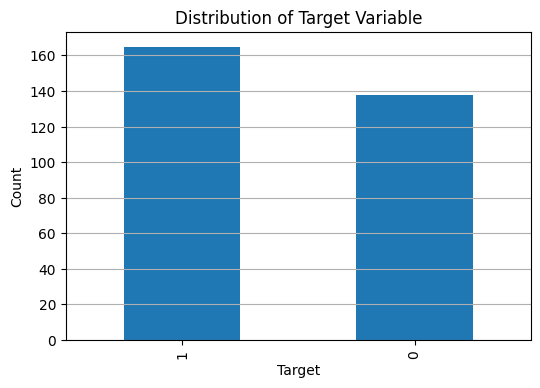

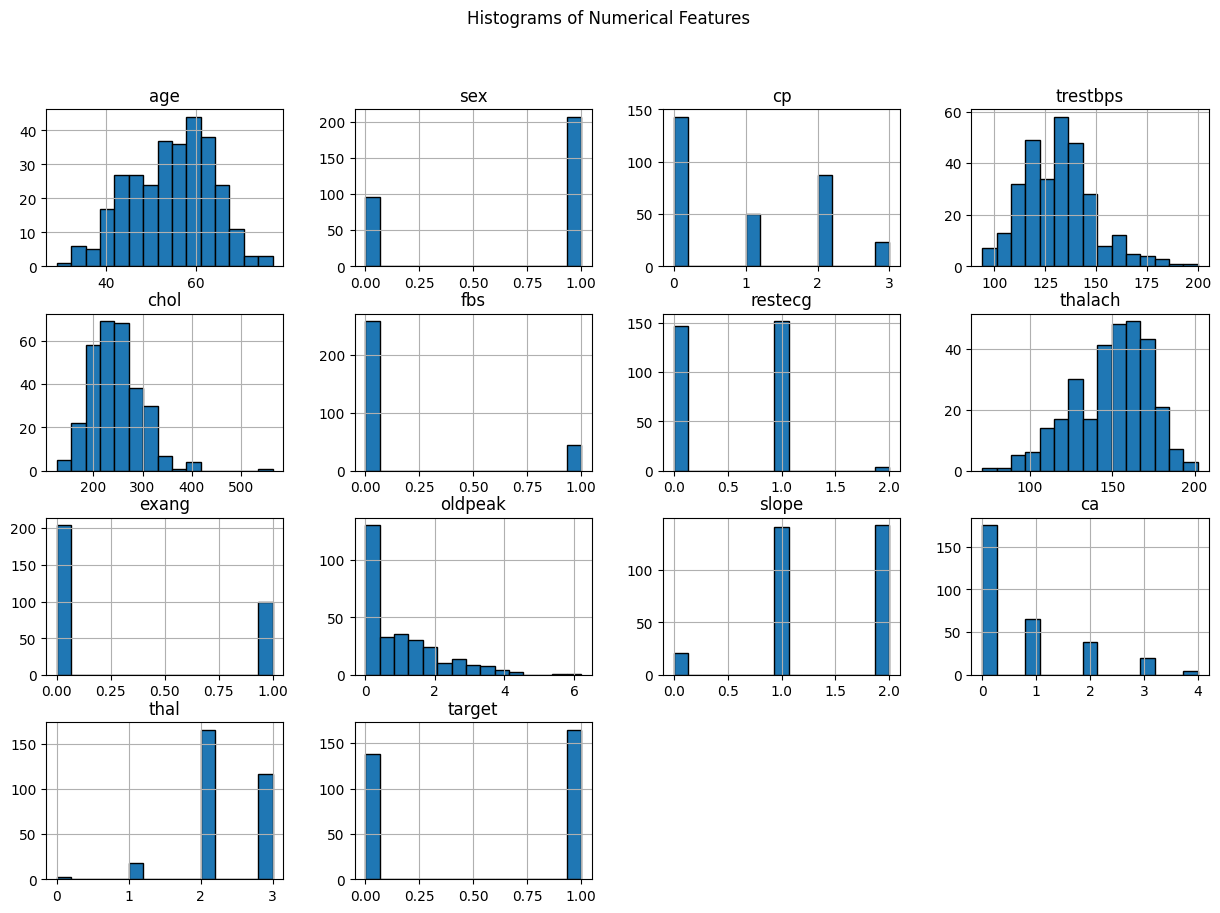

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'heart.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Get basic information about the dataset
print("\nDataset Info:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(data.describe())

# Plot the distribution of the target variable (assuming 'target' column exists)
if 'target' in data.columns:
    plt.figure(figsize=(6, 4))
    data['target'].value_counts().plot(kind='bar')
    plt.title('Distribution of Target Variable')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

# Plot histograms for numerical features
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


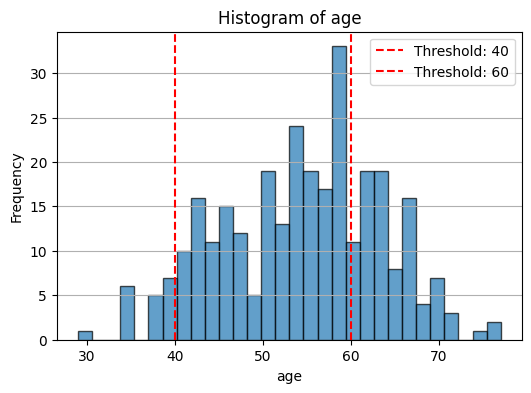

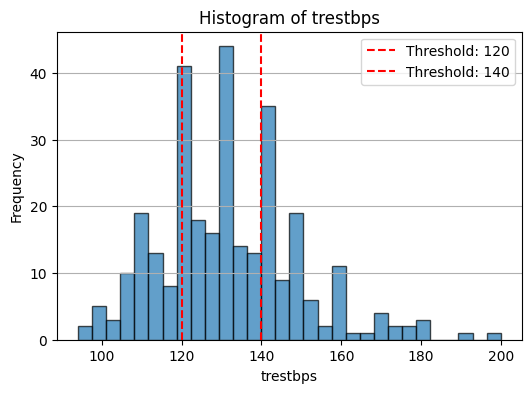

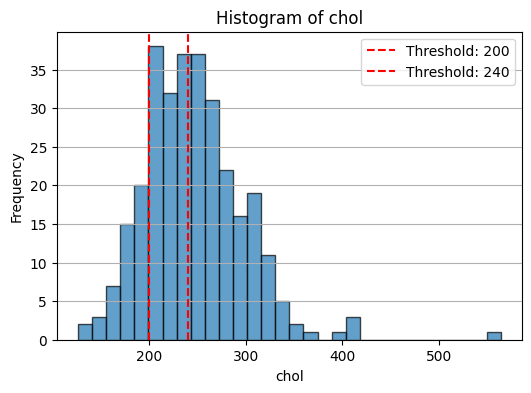

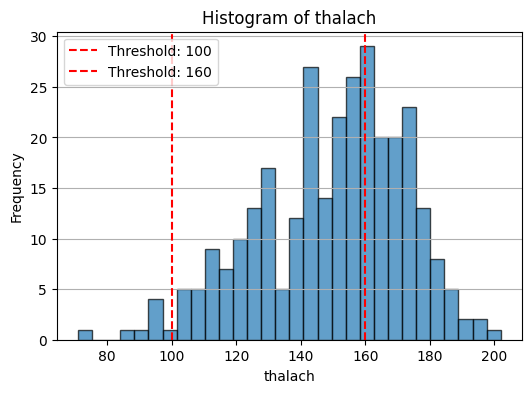

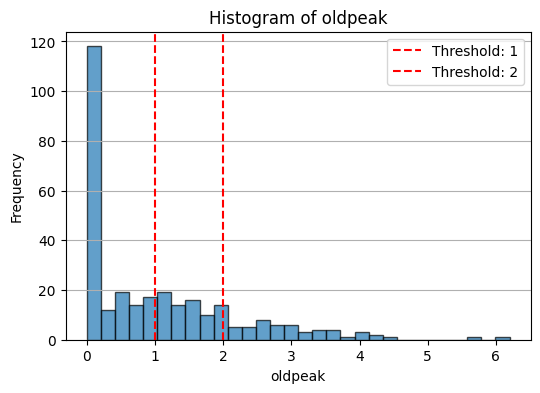

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'heart.csv'
data = pd.read_csv(file_path)

# Define continuous variables for thresholding
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Thresholds for each variable
thresholds = {
    'age': [40, 60],
    'trestbps': [120, 140],
    'chol': [200, 240],
    'thalach': [100, 160],
    'oldpeak': [1, 2]
}

# Plot histograms with thresholds
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    plt.hist(data[var], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Add threshold lines
    for threshold in thresholds[var]:
        plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')

    plt.legend()
    plt.grid(axis='y')
    plt.show()


In [4]:
import pandas as pd

# Load the dataset
file_path = 'heart.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Thresholds for binarization
thresholds = {
    'age': [40, 60],
    'trestbps': [120, 140],
    'chol': [200, 240],
    'thalach': [100, 160],
    'oldpeak': [1, 2]
}

# Binarize the dataset
binarized_data = data.copy()

for var, thres in thresholds.items():
    binarized_data[var] = pd.cut(
        binarized_data[var],
        bins=[-float('inf')] + thres + [float('inf')],
        labels=[f"Low_{var}", f"Medium_{var}", f"High_{var}"]
    )

# Display the binarized dataset
print("Binarized Dataset:")
print(binarized_data.head())


Binarized Dataset:
          age  sex  cp         trestbps         chol  fbs  restecg  \
0    High_age    1   3    High_trestbps  Medium_chol    1        0   
1     Low_age    1   2  Medium_trestbps    High_chol    0        1   
2  Medium_age    0   1  Medium_trestbps  Medium_chol    0        0   
3  Medium_age    1   1     Low_trestbps  Medium_chol    0        1   
4  Medium_age    0   0     Low_trestbps    High_chol    0        1   

          thalach  exang         oldpeak  slope  ca  thal  target  
0  Medium_thalach      0    High_oldpeak      0   0     1       1  
1    High_thalach      0    High_oldpeak      0   0     2       1  
2    High_thalach      0  Medium_oldpeak      2   0     2       1  
3    High_thalach      0     Low_oldpeak      2   0     2       1  
4    High_thalach      1     Low_oldpeak      2   0     2       1  


In [9]:
pd.DataFrame(binarized_data).to_csv('binarized_heart_data.csv')
files.download('binarized_heart_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd
from sklearn.preprocessing import Binarizer

# Example dataset (replace with your actual dataset)
df = pd.read_csv('binarized_heart_data.csv')

# Get dummies for categorical columns (previously binarized)
categorical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # List your categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot encode

# Binarize using quantile-based thresholding for each continuous column (if any remain)
# If all continuous columns were binarized, this step might be unnecessary
binarizer = Binarizer()
# Select numerical columns (if any) for binarization
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.difference(['target', 'Unnamed: 0'])
binary_data = binarizer.fit_transform(df_encoded[numerical_cols])  # Exclude target column and Unnamed: 0

# Create a binary DataFrame for the binary context
binary_context = pd.DataFrame(binary_data, columns=numerical_cols)
binary_context = pd.concat([binary_context, df_encoded[['target', 'Unnamed: 0']]], axis=1)

# binary_context now contains binary data, including one-hot encoded categorical features and the target

In [14]:
import numpy as np

# Binary Decision Function
def binary_decision_function(object_row, concept_intent):
    """
    Checks if an object satisfies the intent of a concept.

    Parameters:
    - object_row: Binary attributes of the object (1D array or Series).
    - concept_intent: Binary attributes defining the intent of a concept.

    Returns:
    - True if the object satisfies the concept intent, False otherwise.
    """
    # Check if all attributes in concept_intent are present in object_row
    # before accessing them
    present_attrs = [attr for attr in concept_intent if attr in object_row.index]
    return all(object_row[attr] == 1 for attr in present_attrs)

# Classifier
def fca_classifier(object_row, concepts, target_col='target'):
    """
    Classifies an object based on the formal concepts.

    Parameters:
    - object_row: Binary attributes of the object (1D array or Series).
    - concepts: List of tuples (extent, intent).
    - target_col: Name of the target column in the binary context.

    Returns:
    - Predicted class label for the object.
    """
    for extent, intent in concepts:
        if binary_decision_function(object_row, intent):
            # Majority vote within the extent for the target
            return binary_context.loc[extent, target_col].mode()[0]
    return None  # No match found

# Extract Patterns
def extract_patterns(binary_context, target_col='target'):
    """
    Extracts patterns (concept intents) for each unique target value.

    Parameters:
    - binary_context: Binary context table (DataFrame).
    - target_col: Name of the target column in the binary context.

    Returns:
    - Dictionary of patterns for each target value.
    """
    patterns = {}
    unique_targets = binary_context[target_col].unique()

    for target in unique_targets:
        target_objects = binary_context[binary_context[target_col] == target]
        pattern = target_objects.drop(columns=[target_col]).all(axis=0)
        patterns[target] = pattern[pattern == True].index.tolist()

    return patterns

# Example Usage
# Define a small example of formal concepts (in practice, compute from binary context)
# Make sure these intents align with the actual column names in binary_context
concepts = [
    ([0, 1, 2], ['age_High', 'chol_High']),  # Example concept - Modified intent attributes
    ([3, 4], ['age_Medium', 'chol_Medium'])  # Example concept - Modified intent attributes
]

# Extract patterns for target classes
patterns = extract_patterns(binary_context, target_col='target')

# Predict class for the first object
test_object = binary_context.iloc[0]
predicted_class = fca_classifier(test_object, concepts, target_col='target')

# Display results
print("Extracted Patterns:")
print(patterns)
print("\nPredicted Class for the First Object:")
print(predicted_class)

Extracted Patterns:
{1: [], 0: ['Unnamed: 0']}

Predicted Class for the First Object:
1


In [15]:
def calculate_accuracy(binary_context, concepts, target_col='target'):
    """
    Calculate the accuracy of the FCA-based classifier.

    Parameters:
    - binary_context: DataFrame containing the binary context table.
    - concepts: List of formal concepts (extent, intent).
    - target_col: Column name of the target variable.

    Returns:
    - Accuracy of the classifier.
    """
    correct_predictions = 0
    total_predictions = len(binary_context)

    for index, row in binary_context.iterrows():
        predicted_class = fca_classifier(row, concepts, target_col=target_col)
        actual_class = row[target_col]
        if predicted_class == actual_class:
            correct_predictions += 1

    return correct_predictions / total_predictions

# Calculate the accuracy of the classifier
accuracy = calculate_accuracy(binary_context, concepts, target_col='target')

# Print the accuracy
print(f"Accuracy of the FCA-based model: {accuracy * 100:.2f}%")


Accuracy of the FCA-based model: 54.46%


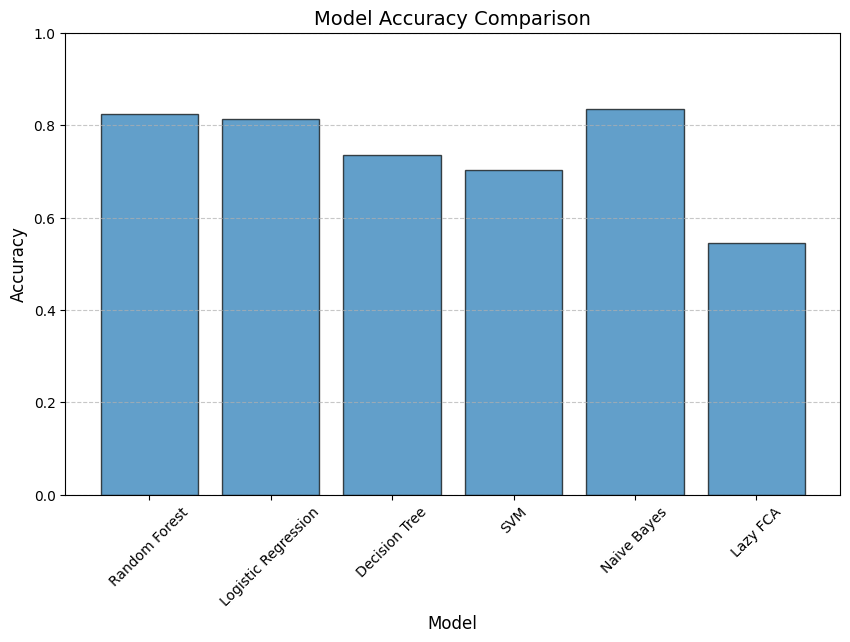

Model Accuracies:
Random Forest: 82.42%
Logistic Regression: 81.32%
Decision Tree: 73.63%
SVM: 70.33%
Naive Bayes: 83.52%
Lazy FCA: 54.46%


In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare original dataset for machine learning
X = data.drop(columns=['target'])
y = data['target']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
model_accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Redefine calculate_accuracy for Lazy FCA
def calculate_accuracy(binary_context, concepts, target_col='target'):
    """
    Calculate the accuracy of the FCA-based classifier.
    """
    correct_predictions = 0
    total_predictions = len(binary_context)

    for index, row in binary_context.iterrows():
        predicted_class = fca_classifier(row, concepts, target_col=target_col)
        actual_class = row[target_col]
        if predicted_class == actual_class:
            correct_predictions += 1

    return correct_predictions / total_predictions

# Calculate Lazy FCA accuracy
lazy_fca_accuracy = calculate_accuracy(binary_context, concepts, target_col='target')
model_accuracies["Lazy FCA"] = lazy_fca_accuracy

# Visualization of accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), alpha=0.7, edgecolor='black')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print model accuracies
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy * 100:.2f}%")


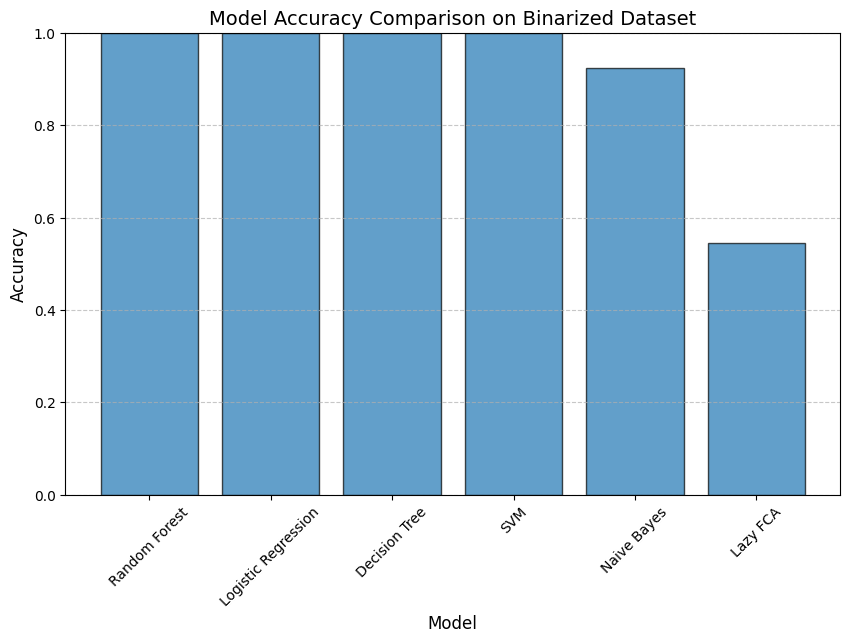

Model Accuracies on Binarized Dataset:
Random Forest: 100.00%
Logistic Regression: 100.00%
Decision Tree: 100.00%
SVM: 100.00%
Naive Bayes: 92.31%
Lazy FCA: 54.46%


In [19]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare the binarized dataset for machine learning
X_binarized = binary_context.drop(columns=['target'])
y_binarized = binary_context['target']

# Split the binarized dataset into train and test sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binarized, y_binarized, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model on the binarized dataset
model_accuracies_binarized = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_bin, y_train_bin)
    # Predict on test data
    y_pred_bin = model.predict(X_test_bin)
    # Calculate accuracy
    accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
    model_accuracies_binarized[model_name] = accuracy_bin

# Redefine the calculate_accuracy function for Lazy FCA
def calculate_accuracy(binary_context, concepts, target_col='target'):
    """
    Calculate the accuracy of the FCA-based classifier.
    """
    correct_predictions = 0
    total_predictions = len(binary_context)

    for index, row in binary_context.iterrows():
        predicted_class = fca_classifier(row, concepts, target_col=target_col)
        actual_class = row[target_col]
        if predicted_class == actual_class:
            correct_predictions += 1

    return correct_predictions / total_predictions

# Calculate Lazy FCA accuracy for the binarized dataset
lazy_fca_accuracy_binarized = calculate_accuracy(binary_context, concepts, target_col='target')
model_accuracies_binarized["Lazy FCA"] = lazy_fca_accuracy_binarized

# Visualization of accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies_binarized.keys(), model_accuracies_binarized.values(), alpha=0.7, edgecolor='black')
plt.title("Model Accuracy Comparison on Binarized Dataset", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print model accuracies
print("Model Accuracies on Binarized Dataset:")
for model, accuracy in model_accuracies_binarized.items():
    print(f"{model}: {accuracy * 100:.2f}%")
